# Análisis de Factores Determinantes en el Resultado de Partidos de Fútbol

Autor: David Lajas Ramos



### Objetivo


**El principal objetivo** es determinar cuáles son las variables más influyentes a la hora de predecir o explicar el resultado de un partido. Por ello se va a analizar si el factor campo y las amonestaciones son importantes.

## Hipótesis

1. Se ganan más partidos como local que como visitante

2. El equipo que tiene más jugadores con tarjeta amarilla, pierde

3. El equipo que tiene más jugadores expulsados, pierde

4. El FC Barcelona es más ayudado que el Real Madrid por los árbitros

### Descripción del Dataset

Se va a utilizar un dataset que muestra los datos de 38 ligas del mundo de lo que llevamos de siglo.

El enlace a los datos es el siguiente: https://www.kaggle.com/datasets/adamgbor/club-football-match-data-2000-2025/data 


Las principales columnas que hay son:

**Date**:	    Fecha del partido.

**League**:	    Nombre de la liga o competición en la que se juega el partido.

**HomeTeam**:	Equipo que juega como local.

**AwayTeam**:	Equipo que juega como visitante.

**FTHG**:	    Goles marcados por el equipo local al final del tiempo reglamentario (Full Time Home Goals).

**FTAG**:	    Goles marcados por el equipo visitante al final del tiempo reglamentario (Full Time Away Goals).

**FTR**:	        Resultado del partido: H = Victoria del local, D = Empate (Draw), A = Victoria del visitante.

**HTHG**:	    Goles del equipo local al medio tiempo (Half Time Home Goals).

**HTAG**:	    Goles del equipo visitante al medio tiempo (Half Time Away Goals).

**HTR**:	        Resultado al medio tiempo (Half Time Result)

**Referee**:	    Nombre del árbitro que dirigió el partido 

**Attendance**:	Número de espectadores del partido 

**Odds_1, Odds_X, Odds_2**:	Cuotas (odds) de apuesta para victoria local (1), empate (X), y victoria visitante (2) antes del partido

**HomeShots,AwayShots**:	Número de tiros que cada equipo hizo en el partido 

**HomeCorners, AwayCorners**:	Número de saques de esquina que cada equipo tuvo 

**HomeYellowCards, AwayYellowCards**:	Tarjetas amarillas recibidas por local y visitante

**HomeRedCards, AwayRedCards**:	Tarjetas rojas recibidas por local y visitante

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

In [37]:
df = pd.read_csv("data/Matches.csv") 

df.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.shape

(230557, 48)

Podemos observar que el data frame tiene 230557 filas y 48 columnas. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  object 
 1   MatchDate    230557 non-null  object 
 2   MatchTime    99072 non-null   object 
 3   HomeTeam     230557 non-null  object 
 4   AwayTeam     230557 non-null  object 
 5   HomeElo      141597 non-null  float64
 6   AwayElo      141528 non-null  float64
 7   Form3Home    229057 non-null  float64
 8   Form5Home    229057 non-null  float64
 9   Form3Away    229057 non-null  float64
 10  Form5Away    229057 non-null  float64
 11  FTHome       230554 non-null  float64
 12  FTAway       230554 non-null  float64
 13  FTResult     230554 non-null  object 
 14  HTHome       175977 non-null  float64
 15  HTAway       175977 non-null  float64
 16  HTResult     175977 non-null  object 
 17  HomeShots    114735 non-null  float64
 18  AwayShots    114738 non-

Podemos comprobar que hay bastantes nulos por lo que habrá que hacer limpieza. 
Asimismo podemos observar que la mayoría de columnas son numéricas.

In [40]:
df.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB',
       'C_PHB'],
      dtype='object')

Tras comprobar el nombre de las columnas procedemos a eliminar las que no nos aportan nada para el análisis.

In [41]:
df = df.iloc[:,:-16]



In [42]:
df = df.drop(columns=["MatchTime", "AwayElo","HomeElo","Form3Home","Form5Home","Form3Away","Form5Away"])

In [43]:
df.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
       'OddHome', 'OddDraw', 'OddAway'],
      dtype='object')

Volvemos a comprobar los nombres de las columnas y confirmamos que tenemos las que necesitamos.

Para las hipótesis vamos a clasificar las ligas en dos grupos. 

El primer grupo va a ser "Grandes ligas", que abarcan: 
F1 Francia  
D1 Alemania 
B1 Belgica 
E0 Inglaterra 
N1 Holanda 
P1 Portugal 
SP1 España 
I1 Italia

Es una clasificación que realiza la UEFA (https://es.uefa.com/nationalassociations/uefarankings/country/?year=2026) las cuales son a noviembre de 2025 las indicadas

Las ligas que no entran dentro de este TOP 7 serán "Resto ligas"

A continuación creamos sendos dataframes.

In [44]:
grandes_ligas = ["SP1","F1", "E0","I1","D1","N1","P1"]

df_grandes_ligas = df[df["Division"].isin(grandes_ligas)]

df_grandes_ligas


,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,H,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.40,4.60
3,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,3.30,3.90
4,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
5,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09
230532,I1,2025-05-25,Torino,Roma,0.0,2.0,A,0.0,1.0,A,...,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57
230533,I1,2025-05-25,Udinese,Fiorentina,2.0,3.0,A,1.0,0.0,H,...,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99
230534,I1,2025-05-25,Venezia,Juventus,2.0,3.0,A,1.0,2.0,A,...,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55


In [45]:

df_resto_ligas = df[~df["Division"].isin(grandes_ligas)]

df_resto_ligas


,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
2,F2,2000-07-28,Wasquehal,Nancy,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F2,2000-07-29,Ajaccio,Le Mans,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,F2,2000-07-29,Beauvais,Montpellier,1.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F2,2000-07-29,Caen,Cannes,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F2,2000-07-29,Chateauroux,Martigues,1.0,1.0,D,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


## Hipótesis 1: Se ganan más partidos como local que como visitante

Jugar como local o visitante puede influir en el desempeño de los equipos debido a factores como el entorno del estadio y las condiciones de viaje. Esta hipótesis plantea analizar si existe una diferencia en la cantidad de victorias obtenidas por los equipos cuando juegan en su estadio frente a cuando juegan como visitantes.

El objetivo es explorar objetivamente si los datos muestran variaciones significativas en los resultados según la ubicación del partido.

A continuación crearemos una función para poder calcular el porcentaje de victorias locales, visitantes y empates.

In [46]:
def lista_porcentaje_HAD(ligas):
    resultados = ligas["FTResult"].value_counts()
    porcentaje_liga =[]
    for i in resultados:
        porcentaje_liga.append(round(i/ligas["FTResult"].count(),3))
    return pd.Series(porcentaje_liga)

Sacamos el porcentaje total, de las grandes ligas y del resto de ligas y creamos el dataframe

In [47]:
porcentaje_total_HAD = lista_porcentaje_HAD(df)

porcentaje_grandes_ligas_HAD = lista_porcentaje_HAD(df_grandes_ligas)

porcentaje_resto_ligas_HAD = lista_porcentaje_HAD(df_resto_ligas)

df_HAD = pd.concat([porcentaje_grandes_ligas_HAD,porcentaje_resto_ligas_HAD,porcentaje_total_HAD],axis=1)
df_HAD
df_HAD = df_HAD.rename(columns={0: "Media grandes ligas", 1: "Media resto ligas", 2: "Media total"})
df_HAD.index= ["Victoria Local","Empate","Victoria Visitante"]
df_HAD

,Media grandes ligas,Media resto ligas,Media total
Victoria Local,0.458,0.442,0.446
Empate,0.287,0.289,0.289
Victoria Visitante,0.255,0.268,0.265


Creamos el gráfico para poder observar las diferencias

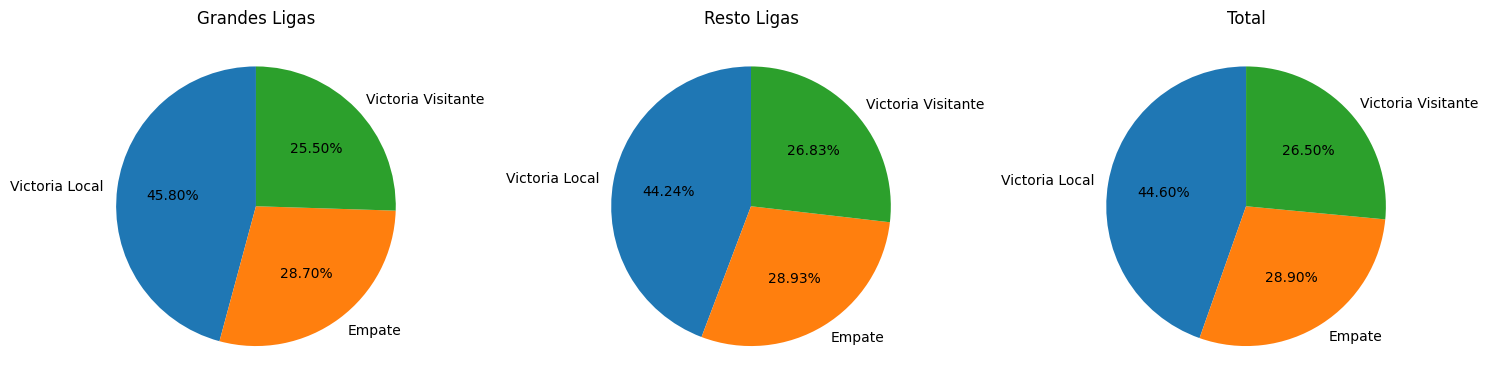

In [48]:
categorias = ["Victoria Local","Empate","Victoria Visitante"]
grandes_ligas = porcentaje_grandes_ligas_HAD
resto_ligas = porcentaje_resto_ligas_HAD
total = porcentaje_total_HAD


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].pie(grandes_ligas, labels=categorias, autopct='%1.2f%%', startangle=90)
axes[0].set_title('Grandes Ligas')


axes[1].pie(resto_ligas, labels=categorias, autopct='%1.2f%%', startangle=90)
axes[1].set_title('Resto Ligas')


axes[2].pie(total, labels=categorias, autopct='%1.2f%%', startangle=90)
axes[2].set_title('Total')


plt.tight_layout()
plt.show()

### Conclusión

Se puede observar en los gráficos que la diferencia de victorias local es un 20% superior en las grandes ligas mientras que en el resto de ligas es un poco inferior, alrededor de un 18%.

Por lo tanto la hipótesis de que se ganan más partidos como local que como visitante es **correcta**

Esto podría deberse al apoyo del público, la familiaridad con el campo de juego, las dimensiones y el clima y un menor desgaste físico y mental al evitar largos viajes.

## Hipótesis 2: El número de tarjetas amarillas incide negativamente en el resultado final.

Las tarjetas amarillas son sanciones que reflejan infracciones durante un partido. Esta hipótesis plantea analizar si existe una relación entre la cantidad de tarjetas amarillas recibidas por un equipo y su desempeño en los partidos, considerando victorias, empates y derrotas.

El objetivo es evaluar de manera objetiva si los datos muestran algún patrón entre el número de amonestaciones y los resultados de los equipos.



En este caso tenemos que eliminar los valores nulos que tienen las tarjetas amarillas.

In [49]:
lista_amarilla_partido = df["AwayYellow"].dropna()

lista_amarilla_partido = df["HomeYellow"].dropna()

Creamos las máscaras necesarias para poder conseguir el dataframe de las grandes ligas como necesitamos

In [50]:
mascara_partidos_amarilla_gl = (df_grandes_ligas["HomeYellow"]>0)| (df_grandes_ligas["AwayYellow"]>0)

df_amarilla_partido_gl = df_grandes_ligas[mascara_partidos_amarilla_gl]

mascara_local_mas_amarillas_gl = df_amarilla_partido_gl["HomeYellow"] > df_amarilla_partido_gl["AwayYellow"]

resultados_amarilla_local_gl = df_amarilla_partido_gl[mascara_local_mas_amarillas_gl].value_counts(df_amarilla_partido_gl["FTResult"])

mascara_visitante_mas_amarillas_gl = df_amarilla_partido_gl["HomeYellow"] < df_amarilla_partido_gl["AwayYellow"]

resultados_amarilla_visitante_gl = df_amarilla_partido_gl[mascara_visitante_mas_amarillas_gl].value_counts(df_amarilla_partido_gl["FTResult"])

mascara_igual_amarillas_gl = df_amarilla_partido_gl["HomeYellow"] == df_amarilla_partido_gl["AwayYellow"]

resultados_amarilla_igual_gl = df_amarilla_partido_gl[mascara_igual_amarillas_gl].value_counts(df_amarilla_partido_gl["FTResult"])

df_amarillas_final_gl = pd.DataFrame([resultados_amarilla_local_gl,resultados_amarilla_visitante_gl,resultados_amarilla_igual_gl])

df_amarillas_final_gl = df_amarillas_final_gl.rename(columns={"H":"Victoria local", "D":"Empate","A" : "Victoria visitante",})

df_amarillas_final_gl.index= ["Más amarillas a local","Más amarillas a visitante", "Igual amarillas"]

df_amarillas_final_gl = df_amarillas_final_gl[["Victoria local","Empate","Victoria visitante"]]

df_amarillas_final_gl

FTResult,Victoria local,Empate,Victoria visitante
Más amarillas a local,5209,3486,4748
Más amarillas a visitante,9710,4895,4868
Igual amarillas,4019,2361,2738


Hacemos lo propio para el resto de ligas 

In [51]:
mascara_partidos_amarilla_rl = (df_resto_ligas["HomeYellow"]>0)| (df_resto_ligas["AwayYellow"]>0)

df_amarilla_partido_rl = df_resto_ligas[mascara_partidos_amarilla_rl]

mascara_local_mas_amarillas_rl = df_amarilla_partido_rl["HomeYellow"] > df_amarilla_partido_rl["AwayYellow"]

resultados_amarilla_local_rl = df_amarilla_partido_rl[mascara_local_mas_amarillas_rl].value_counts(df_amarilla_partido_rl["FTResult"])

mascara_visitante_mas_amarillas_rl = df_amarilla_partido_rl["HomeYellow"] < df_amarilla_partido_rl["AwayYellow"]

resultados_amarilla_visitante_rl = df_amarilla_partido_rl[mascara_visitante_mas_amarillas_rl].value_counts(df_amarilla_partido_rl["FTResult"])

mascara_igual_amarillas_rl = df_amarilla_partido_rl["HomeYellow"] == df_amarilla_partido_rl["AwayYellow"]

resultados_amarilla_igual_rl = df_amarilla_partido_rl[mascara_igual_amarillas_rl].value_counts(df_amarilla_partido_rl["FTResult"])


df_amarillas_final_rl = pd.DataFrame([resultados_amarilla_local_rl,resultados_amarilla_visitante_rl,resultados_amarilla_igual_rl])

df_amarillas_final_rl = df_amarillas_final_rl.rename(columns={"H":"Victoria local","D":"Empate","A" : "Victoria visitante"})

df_amarillas_final_rl.index= ["Más amarillas a local","Más amarillas a visitante","Igual amarillas"]

df_amarillas_final_rl = df_amarillas_final_rl[["Victoria local","Empate","Victoria visitante"]]

df_amarillas_final_rl


FTResult,Victoria local,Empate,Victoria visitante
Más amarillas a local,8933,6154,7459
Más amarillas a visitante,15322,8927,9225
Igual amarillas,6570,4196,4724


Creamos los gráficos para visualizar y poder comparar

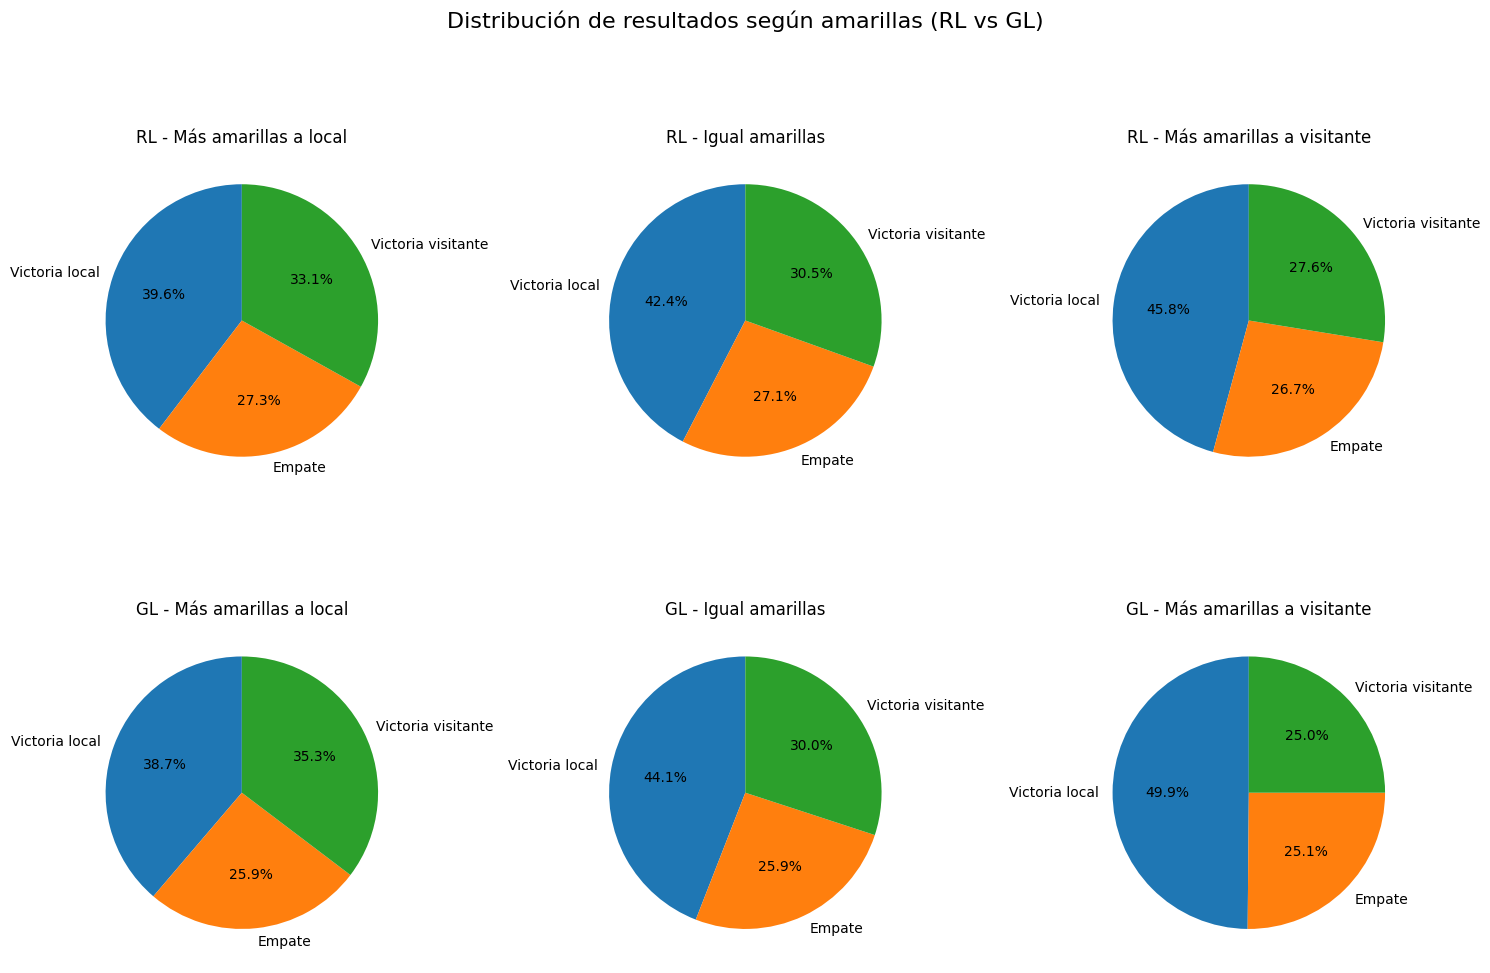

In [52]:
labels_rl = df_amarillas_final_rl.columns
amarilla_local_rl = df_amarillas_final_rl.loc["Más amarillas a local"]
amarilla_visitante_rl = df_amarillas_final_rl.loc["Más amarillas a visitante"]
amarilla_igual_rl = df_amarillas_final_rl.loc["Igual amarillas"]

total_amarilla_local_rl = sum(amarilla_local_rl)
total_amarilla_visitante_rl = sum(amarilla_visitante_rl)
total_amarilla_igual_rl = sum(amarilla_igual_rl)

porcentaje_local_rl = [x / total_amarilla_local_rl * 100 for x in amarilla_local_rl]
porcentaje_visitante_rl = [x / total_amarilla_visitante_rl * 100 for x in amarilla_visitante_rl]
porcentaje_igual_rl = [x / total_amarilla_igual_rl * 100 for x in amarilla_igual_rl]


labels_gl = df_amarillas_final_gl.columns
amarilla_local_gl = df_amarillas_final_gl.loc["Más amarillas a local"]
amarilla_visitante_gl = df_amarillas_final_gl.loc["Más amarillas a visitante"]
amarilla_igual_gl = df_amarillas_final_gl.loc["Igual amarillas"]

total_amarilla_local_gl = sum(amarilla_local_gl)
total_amarilla_visitante_gl = sum(amarilla_visitante_gl)
total_amarilla_igual_gl = sum(amarilla_igual_gl)

porcentaje_local_gl = [x / total_amarilla_local_gl * 100 for x in amarilla_local_gl]
porcentaje_visitante_gl = [x / total_amarilla_visitante_gl * 100 for x in amarilla_visitante_gl]
porcentaje_igual_gl = [x / total_amarilla_igual_gl * 100 for x in amarilla_igual_gl]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))


axes[0, 0].pie(porcentaje_local_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('RL - Más amarillas a local')

axes[0, 2].pie(porcentaje_visitante_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('RL - Más amarillas a visitante')

axes[0, 1].pie(porcentaje_igual_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title("RL - Igual amarillas")

# Fila 2: GL
axes[1, 0].pie(porcentaje_local_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('GL - Más amarillas a local')

axes[1, 2].pie(porcentaje_visitante_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('GL - Más amarillas a visitante')

axes[1, 1].pie(porcentaje_igual_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('GL - Igual amarillas')


plt.suptitle('Distribución de resultados según amarillas (RL vs GL)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Conclusión


En los gráficos se puede observar que teniendo más tarjetas amarillas se obtienen peores resultados para los más amonestados. A pesar de ello, no tiene la suficiente importancia como para que sea un factor que haga que se inviertan las estadísticas. 

Se puede observar que en las grandes ligas es un factor más importante que en el resto de ligas, ya que las victorias varían entre un  5% y un 6% cuando hay un desbalance en las amonestaciones mientras que en el resto de ligas un 3%.

Por lo tanto la hipótesis de que el número de tarjetas amarillas incide negativamente en el resultado final es **correcta**

Esto podría deberse al miedo del jugador amonestado en ser expulsado, lo que hace que vaya con menos intensidad en ocasiones.

## Hipótesis 3: El número de tarjetas rojas incide negativamente en el resultado final.

Las tarjetas rojas en el fútbol representan la expulsión de un jugador durante un partido. 

Esta hipótesis plantea que existe una relación entre el número de tarjetas rojas recibidas por un equipo y su desempeño en el resultado final del partido.

El análisis se enfocará en:

Comparar la cantidad de tarjetas rojas con los resultados finales (victorias, empates y derrotas).

En este caso tenemos que eliminar los valores nulos que tienen las tarjetas rojas en el dataset.

In [53]:
df_roja_partido = df["AwayRed"].dropna()

df_roja_partido = df["HomeRed"].dropna()

Creamos las máscaras necesarias para poder conseguir el dataframe de las grandes ligas como necesitamos

In [54]:
mascara_partidos_roja_gl = (df_grandes_ligas["HomeRed"]>0)| (df_grandes_ligas["AwayRed"]>0)

df_roja_partido_gl = df_grandes_ligas[mascara_partidos_roja_gl]

mascara_local_mas_rojas_gl = df_roja_partido_gl["HomeRed"] > df_roja_partido_gl["AwayRed"]

resultados_roja_local_gl = df_roja_partido_gl[mascara_local_mas_rojas_gl].value_counts(df_roja_partido_gl["FTResult"])

mascara_visitante_mas_rojas_gl = df_roja_partido_gl["HomeRed"] < df_roja_partido_gl["AwayRed"]

resultados_roja_visitante_gl = df_roja_partido_gl[mascara_visitante_mas_rojas_gl].value_counts(df_roja_partido_gl["FTResult"])

df_rojas_final_gl = pd.DataFrame([resultados_roja_local_gl,resultados_roja_visitante_gl])

df_rojas_final_gl = df_rojas_final_gl.rename(columns={"H":"Victoria local","D":"Empate","A" : "Victoria visitante" })

df_rojas_final_gl.index= ["Más rojas a local","Más rojas a visitante"]

df_rojas_final_gl = df_rojas_final_gl[["Victoria local","Empate","Victoria visitante"]]

df_rojas_final_gl


FTResult,Victoria local,Empate,Victoria visitante
Más rojas a local,731,892,1615
Más rojas a visitante,2774,1040,620


Hacemos el mismo proceso con el resto de ligas

In [55]:
mascara_partidos_roja_rl = (df_resto_ligas["HomeRed"]>0)| (df_resto_ligas["AwayRed"]>0)

df_roja_partido_rl = df_resto_ligas[mascara_partidos_roja_rl]

mascara_local_mas_rojas_rl = df_roja_partido_rl["HomeRed"] > df_roja_partido_rl["AwayRed"]

resultados_roja_local_rl = df_roja_partido_rl[mascara_local_mas_rojas_rl].value_counts(df_roja_partido_rl["FTResult"])

mascara_visitante_mas_rojas_rl = df_roja_partido_rl["HomeRed"] < df_roja_partido_rl["AwayRed"]

resultados_roja_visitante_rl = df_roja_partido_rl[mascara_visitante_mas_rojas_rl].value_counts(df_roja_partido_rl["FTResult"])

df_rojas_final_rl = pd.DataFrame([resultados_roja_local_rl,resultados_roja_visitante_rl])

df_rojas_final_rl = df_rojas_final_rl.rename(columns={"H":"Victoria local","D":"Empate","A" : "Victoria visitante"})

df_rojas_final_rl.index= ["Más rojas a local","Más rojas a visitante"]

df_rojas_final_rl = df_rojas_final_rl[["Victoria local","Empate","Victoria visitante"]]

df_rojas_final_rl

FTResult,Victoria local,Empate,Victoria visitante
Más rojas a local,1148,1347,2448
Más rojas a visitante,4331,1674,1053


Creamos los gráficos con los datos recogidos

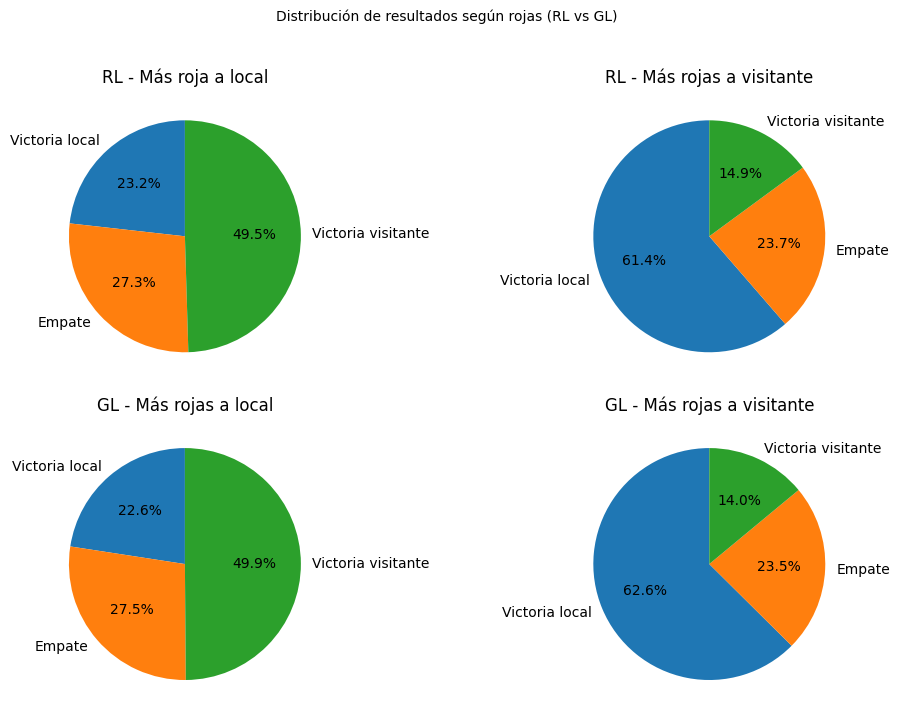

In [56]:
abels_rl = df_rojas_final_rl.columns
roja_local_rl = df_rojas_final_rl.loc["Más rojas a local"]
roja_visitante_rl = df_rojas_final_rl.loc["Más rojas a visitante"]


total_roja_local_rl = sum(roja_local_rl)
total_roja_visitante_rl = sum(roja_visitante_rl)


porcentaje_local_rl = [x / total_roja_local_rl * 100 for x in roja_local_rl]
porcentaje_visitante_rl = [x / total_roja_visitante_rl * 100 for x in roja_visitante_rl]



labels_gl = df_rojas_final_gl.columns
roja_local_gl = df_rojas_final_gl.loc["Más rojas a local"]
roja_visitante_gl = df_rojas_final_gl.loc["Más rojas a visitante"]

total_roja_local_gl = sum(roja_local_gl)
total_roja_visitante_gl = sum(roja_visitante_gl)

porcentaje_local_gl = [x / total_roja_local_gl * 100 for x in roja_local_gl]
porcentaje_visitante_gl = [x / total_roja_visitante_gl * 100 for x in roja_visitante_gl]


fig, axes = plt.subplots(2, 2, figsize=(10, 7))


axes[0, 0].pie(porcentaje_local_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('RL - Más roja a local')

axes[0, 1].pie(porcentaje_visitante_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('RL - Más rojas a visitante')



axes[1, 0].pie(porcentaje_local_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('GL - Más rojas a local')

axes[1, 1].pie(porcentaje_visitante_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('GL - Más rojas a visitante')



plt.suptitle('Distribución de resultados según rojas (RL vs GL)', fontsize=10, y=1.02)
plt.tight_layout()
plt.show()

### Conclusión

En estos gráficos, junto a los de la primer hipótesis, se puede observar que cuando el equipo expulsado es del equipo local, el porcentaje de victoria visitante sube hasta casi el 50% cuando era de un 25%, mientras que cuando expulsan al visitante sube el porcentaje de victoria de alrededor 45% al 62%.

Además se puede observar que los resultados se parejan entre las grandes ligas y el resto.

Por lo tanto la hipótesis de que el número de tarjetas rojas incide negativamente en el resultado final es **correcta**

Esta diferencia tan drástica se puede deber a que hay una inferioridad numérica dentro del campo, por lo que se genera una gran desventaja táctica. Asimismo, los jugadores se desgastan más ya que tienen que cubrir más terreno de juego. Es por ello que se podría decir que recibir una tarjeta roja tiene una gran incidencia en el resultado final de un partido.

## Hipótesis 4: El FC Barcelona es más ayudado que el Real Madrid por los árbitros

El Real Madrid y el FC Barcelona son dos de los equipos más destacados del fútbol español. Esta hipótesis busca analizar si existen diferencias en la cantidad de tarjetas amarillas y rojas recibidas por cada equipo, explorando patrones en la influencia arbitral sobre sus partidos.

El objetivo es evaluar de manera objetiva si los datos muestran variaciones significativas entre ambos equipos, sin asumir juicios sobre favoritismo.

Comenzamos sacando los datos de tarjetas amarillas relacionadas con el FC Barcelona. Distinguiremos las recibidas como local y como visitante y del mismo modo las recibidas por el rival al que se enfrentaban. Ya que como hemos comprobado en anteriores hipótesis, hay diferencia entre ser local y visitante.

Extraeremos también las faltas realizadas y recibidas del mismo modo que las tarjetas amarillas. De esta forma sabremos el número de faltas que tiene que realizar o le tienen que hacer para ser amonestado.

In [57]:
mascara_barsa = (df["HomeTeam"] == "Barcelona") | (df["AwayTeam"] == "Barcelona")

df_barsa_amarillas = df[mascara_barsa]

df_barsa_amarillas.dropna(inplace=True)

Am_Recib_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeYellow"].sum()

Falt_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeFouls"].sum()

Falt_Ama_H_Bar = Falt_H_Bar/Am_Recib_H_Bar

Am_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayYellow"].sum()

Falt_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayFouls"].sum()

Falt_Ama_H_Riv_Bar = Falt_Rival_H_Bar/Am_Rival_H_Bar

Am_Recib_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayYellow"].sum()

Falt_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayFouls"].sum()

Falt_Ama_A_Bar = Falt_A_Bar/Am_Recib_A_Bar

Am_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeYellow"].sum()

Falt_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeFouls"].sum()

Falt_Ama_A_Riv_Bar = Falt_Rival_A_Bar/Am_Rival_A_Bar



C:\Users\david\AppData\Local\Temp\ipykernel_10092\3997731474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barsa_amarillas.dropna(inplace=True)


A continuación se procederá a realizar lo mismo con las tarjetas rojas que, como hemos comprobado en la anterior hipótesis, es un factor de gran importancia.

In [58]:
Ro_Recib_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeRed"].sum()

Falt_Ro_H_Bar = Falt_H_Bar/Ro_Recib_H_Bar

Ro_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayRed"].sum()

Falt_Ro_H_Riv_Bar = Falt_Rival_H_Bar/Ro_Rival_H_Bar

Ro_Recib_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayRed"].sum()

Falt_Ro_A_Bar = Falt_A_Bar/Ro_Recib_A_Bar

Ro_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeRed"].sum()

Falt_Ro_A_Riv_Bar = Falt_Rival_A_Bar/Ro_Rival_A_Bar



A continuación se procederá a procesar los datos del Real Madrid

In [59]:
mascara_RM = (df["HomeTeam"] == "Real Madrid") | (df["AwayTeam"] == "Real Madrid")

df_RM_amarillas = df[mascara_RM]

df_RM_amarillas.dropna(inplace=True)

Am_Recib_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeYellow"].sum()

Falt_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeFouls"].sum()

Falt_Ama_H_RM = Falt_H_RM/Am_Recib_H_RM

Am_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayYellow"].sum()

Falt_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayFouls"].sum()

Falt_Ama_H_Riv_RM = Falt_Rival_H_RM/Am_Rival_H_RM

Am_Recib_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayYellow"].sum()

Falt_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayFouls"].sum()

Falt_Ama_A_RM = Falt_A_RM/Am_Recib_A_RM

Am_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeYellow"].sum()

Falt_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeFouls"].sum()

Falt_Ama_A_Riv_RM = Falt_Rival_A_RM/Am_Rival_A_RM


C:\Users\david\AppData\Local\Temp\ipykernel_10092\2792416303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RM_amarillas.dropna(inplace=True)


A continuación realizaremos la extracción de los datos de las tarjetas rojas

In [60]:
Ro_Recib_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeRed"].sum()

Falt_Ro_H_RM = Falt_H_RM/Ro_Recib_H_RM

Ro_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayRed"].sum()

Falt_Ro_H_Riv_RM = Falt_Rival_H_RM/Ro_Rival_H_RM

Ro_Recib_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayRed"].sum()

Falt_Ro_A_RM = Falt_H_RM/Ro_Recib_A_RM

Ro_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeRed"].sum()

Falt_Ro_A_Riv_RM = Falt_Rival_A_RM/Ro_Rival_A_RM


Para poder comparar, lo haremos con el resto de equipos de La Liga. Ya que en cada liga tienen un estilo de arbitraje distinto y que los datos sean lo más precisos posible. A continuación sacaremos la media.

In [61]:
mask_resto_liga_sanciones = (df["Division"] == "SP1") & (df["HomeTeam"] != "Real Madrid") & (df["HomeTeam"] != "Barcelona") & (df["AwayTeam"] != "Real Madrid") & (df["AwayTeam"] != "Barcelona") 

df_resto_liga = df[mask_resto_liga_sanciones]

df_resto_liga = df_resto_liga.dropna()

media_fal_am_local = df_resto_liga["HomeFouls"].mean()/df_resto_liga["HomeYellow"].mean()

media_fal_am_visit = df_resto_liga["AwayFouls"].mean()/df_resto_liga["AwayYellow"].mean()

media_fal_ro_local = df_resto_liga["HomeFouls"].mean()/df_resto_liga["HomeRed"].mean()

media_fal_ro_visit = df_resto_liga["AwayFouls"].mean()/df_resto_liga["AwayRed"].mean()


Tras realizar toda la extracción de datos. Procedemos a crear el dataframe para poder realizar el análisis.

In [62]:
Real_Madrid_amarillas = pd.Series([Falt_Ama_H_RM,Falt_Ama_H_Riv_RM,Falt_Ama_A_Riv_RM, Falt_Ama_A_RM], name = "Real Madrid")

Barsa_amarillas = pd.Series([Falt_Ama_H_Bar,Falt_Ama_H_Riv_Bar, Falt_Ama_A_Riv_Bar,Falt_Ama_A_Bar], name = "Barsa")

Resto_liga_amarillas =pd.Series([media_fal_am_local,media_fal_am_visit, media_fal_am_local, media_fal_am_visit], name ="Media liga")

df_amarillas = pd.concat([Real_Madrid_amarillas, Barsa_amarillas, Resto_liga_amarillas],axis =1)

df_amarillas = df_amarillas.rename(index={0:"Faltas realizadas/TA(como local)",1:"Faltas recibidas/TA Riv(como Local)",2:"Faltas recibidas/TA Riv (como Visitante)",3:"Faltas realizadas/TA (como Visitante)"})

df_amarillas.transpose().round(2)

df_amarillas

,Real Madrid,Barsa,Media liga
Faltas realizadas/TA(como local),6.711940,6.797716,5.973363
Faltas recibidas/TA Riv(como Local),5.786922,5.452356,5.427009
Faltas recibidas/TA Riv (como Visitante),5.539359,6.009404,5.973363
Faltas realizadas/TA (como Visitante),5.313886,5.217005,5.427009


Creamos el gráfico de las faltas necesarias para que saquen tarjeta amarilla para poder hacer el análisis

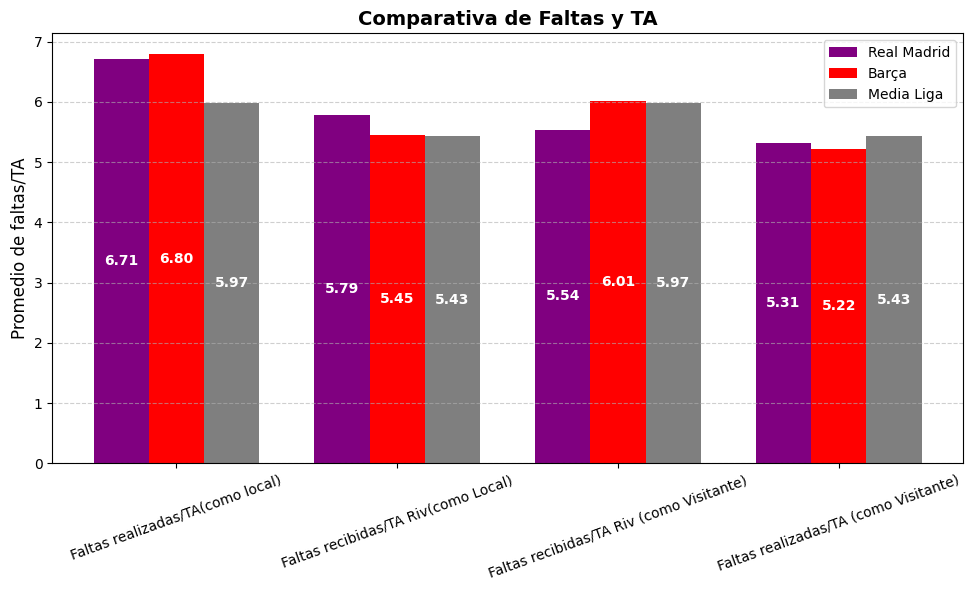

In [63]:
estadisticas_amarillas = df_amarillas.index.tolist()

real_madrid = Real_Madrid_amarillas
barca = Barsa_amarillas
media_liga = Resto_liga_amarillas


x = np.arange(len(estadisticas_amarillas))
ancho = 0.25

plt.figure(figsize=(10, 6))


bars_rm = plt.bar(x - ancho, real_madrid, width=ancho, label="Real Madrid",color="#800080")
bars_barca = plt.bar(x, barca, width=ancho, label="Barça", color = "red")
bars_media = plt.bar(x + ancho, media_liga, width=ancho, label="Media Liga", color = "#7F7F7F")


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height/2,                         
            f"{height:.2f}",                  
            ha='center', va='center', color='white', fontsize=10, fontweight='bold'
        )

add_labels(bars_rm)
add_labels(bars_barca)
add_labels(bars_media)


plt.xticks(x, estadisticas_amarillas, rotation=20, fontsize=10)
plt.ylabel("Promedio de faltas/TA", fontsize=12)
plt.title("Comparativa de Faltas y TA", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [65]:
Real_Madrid_rojas = pd.Series ([Falt_Ro_H_RM, Falt_Ro_H_Riv_RM,  Falt_Ro_A_Riv_RM, Falt_Ro_A_RM], name = "Real Madrid")
Barsa_rojas = pd.Series ([Falt_Ro_H_Bar, Falt_Ro_H_Riv_Bar, Falt_Ro_A_Riv_Bar, Falt_Ro_A_Bar], name = "Barsa")
Resto_liga_rojas = pd.Series ([media_fal_ro_local, media_fal_ro_visit, media_fal_ro_local, media_fal_ro_visit], name = "Media liga")
df_rojas = pd.concat([Real_Madrid_rojas, Barsa_rojas, Resto_liga_rojas],axis =1)

df_rojas = df_rojas.rename(index={0:"Faltas realizadas/TR(como local)",1:"Faltas recibidas/TR Riv(como Local)",2:"Faltas recibidas/TR Riv (como Visitante)",3:"Faltas realizadas/TR (como Visitante)"}) 

df_rojas.transpose().round(2)

,Faltas realizadas/TR(como local),Faltas recibidas/TR Riv(como Local),Faltas recibidas/TR Riv (como Visitante),Faltas realizadas/TR (como Visitante)
Real Madrid,128.49,111.59,121.28,83.28
Barsa,160.27,104.14,85.84,105.41
Media liga,109.53,88.36,109.53,88.36


Realizamos el gráfico de las faltas necesarias para que saquen tarjeta roja para poder analizar los datos 

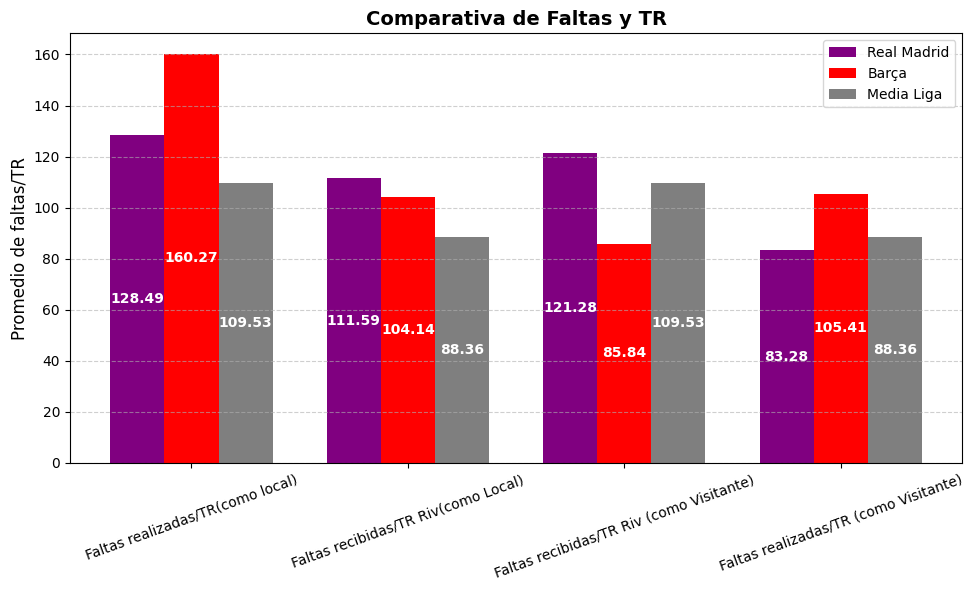

In [66]:
estadisticas_rojas = df_rojas.index.tolist()

real_madrid = Real_Madrid_rojas
barca = Barsa_rojas
media_liga = Resto_liga_rojas


x = np.arange(len(estadisticas_rojas))
ancho = 0.25

plt.figure(figsize=(10, 6))


bars_rm = plt.bar(x - ancho, real_madrid, width=ancho, label="Real Madrid",color="#800080")
bars_barca = plt.bar(x, barca, width=ancho, label="Barça", color = "red")
bars_media = plt.bar(x + ancho, media_liga, width=ancho, label="Media Liga", color = "#7F7F7F")


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,  
            height/2,                         
            f"{height:.2f}",                  
            ha='center', va='center', color='white', fontsize=10, fontweight='bold'
        )

add_labels(bars_rm)
add_labels(bars_barca)
add_labels(bars_media)


plt.xticks(x, estadisticas_rojas, rotation=20, fontsize=10)
plt.ylabel("Promedio de faltas/TR", fontsize=12)
plt.title("Comparativa de Faltas y TR", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Ante la gran diferencia entre los datos del Real Madrid y del FC Barcelona, se va a realizar un nuevo gráfico para comprobar cuánta diferencia porcentual hay con la media de La Liga.

In [68]:
RM_diferenciaTR_medialiga = ((Real_Madrid_rojas - Resto_liga_rojas)/Resto_liga_rojas)*100

B_diferenciaTR_medialiga = ((Barsa_rojas - Resto_liga_rojas)/Resto_liga_rojas)*100


df_diferencia = pd.concat([RM_diferenciaTR_medialiga,B_diferenciaTR_medialiga], axis= 1)

df_diferencia = df_diferencia.rename(index={0:"Faltas realizadas/TR(como local)",1:"Faltas recibidas/TR Riv(como Local)",2:"Faltas recibidas/TR Riv (como Visitante)",3:"Faltas realizadas/TR (como Visitante)"}) 

df_diferencia = df_diferencia.transpose().rename(index={0:"Real Madrid",1: "Barsa"})

df_diferencia.round(2)


,Faltas realizadas/TR(como local),Faltas recibidas/TR Riv(como Local),Faltas recibidas/TR Riv (como Visitante),Faltas realizadas/TR (como Visitante)
Real Madrid,17.30,26.29,10.72,-5.75
Barsa,46.32,17.86,-21.63,19.30


Pintamos el gráfico para que se vean mejor las diferencias

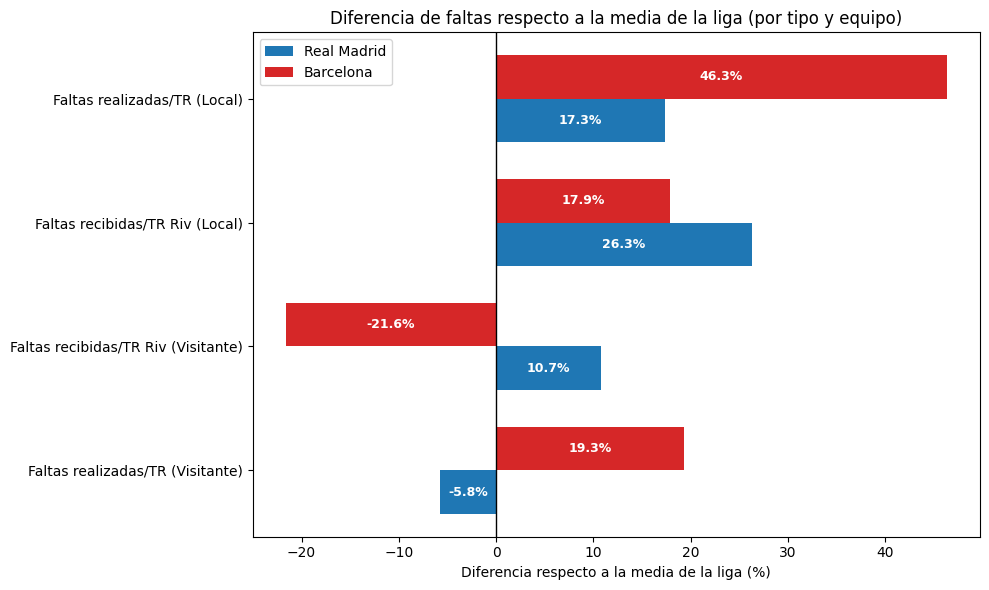

In [69]:
data_diff = {
    'Métrica': [
        'Faltas realizadas/TR (Local)',
        'Faltas recibidas/TR Riv (Local)',
        'Faltas recibidas/TR Riv (Visitante)',
        'Faltas realizadas/TR (Visitante)'
    ],
    'Real Madrid':RM_diferenciaTR_medialiga ,
    'Barcelona': B_diferenciaTR_medialiga
}

df = pd.DataFrame(data_diff)


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(df))


bars_rm = ax.barh([i + bar_width/2 for i in x], df['Real Madrid'], bar_width, label='Real Madrid', color='#1f77b4')
bars_barsa = ax.barh([i - bar_width/2 for i in x], df['Barcelona'], bar_width, label='Barcelona', color='#d62728')


ax.axvline(0, color='black', linewidth=1)


ax.set_yticks(x)
ax.set_yticklabels(df['Métrica'])
ax.set_xlabel('Diferencia respecto a la media de la liga (%)')
ax.set_title('Diferencia de faltas respecto a la media de la liga (por tipo y equipo)')
ax.legend()


ax.invert_yaxis()


def label_inside(bars):
    for bar in bars:
        value = bar.get_width()
        text_color = 'white'
        ax.text(
            value / 2,                              
            bar.get_y() + bar.get_height() / 2,     
            f'{value:.1f}%',                        
            ha='center', va='center', color=text_color, fontsize=9, fontweight='bold'
        )

label_inside(bars_rm)
label_inside(bars_barsa)


plt.tight_layout()
plt.show()

### Conclusión

Se puede observar que en tarjetas amarillas mostradas no hay mucha diferencia entre la media de La Liga, el Real Madrid y el Barsa. Sin embargo, sí que se ve una clara diferencia en el trato arbitral con las tarjetas rojas. Para que echen a un jugador del Barsa en casa tiene que realizar 160 faltas mientras que el Madrid 128, siendo la media de La Liga 109. Aquí, el Barsa sale favorecido.

Sin embargo, los rivales en feudo contrario tienen que hacer 111 faltas al Real Madrid para que les explusen un jugador, mientras que al Barsa 104. En este caso, ambos por encima de la media y siendo el Barsa vuelto a ser favorecido.

Observando las estadísticas en campo visitante de Madrid y Barsa, podemos observar que para que expulsen a un jugador rival, al Madrid le tiene que hacer 121 faltas frente a las 85 que le tienen que hacer al Barsa. Estando el Barsa un 21% por debajo de la media de La Liga que son 109. Otra vez, el Barsa sale favorecido.

Asimismo, el Madrid tiene que realizar 83 faltas para que le expulsen a un jugador, estando por debajo de la media de La Liga que se necesita de promedio, 88 infracciones para ser expulsado. De nuevo, el Barsa sale favorecido en este dato, ya que para que un jugador de su equipo sea expulsado son necesarias 105 faltas.

Examinando las anteriores hipótesis, averiguamos que las tarjetas rojas eran un factor muy importante en el transcurso de un partido. Tras analizar este apartado y viendo la anomalía estadistica, se puede sacar en claro que el Barsa fue más ayudado por los árbitros que el Real Madrid.

Por lo tanto, la hipótesis de que El FC Barcelona es más ayudado que el Real Madrid por los árbitros es **correcta**

Esta diferencia tan grande puede deberse a que, según varios medios, el club catalán estuvo pagando al vicepresidente del Comité Tecnico de Árbitros 8,3 millones entre 2001 y 2018.